Information about your group!

| <p style="text-align: center;">First Name</p> | <p style="text-align: center;">Family Name</p> | Matr.-No.   |
|-----------------------------------------------|------------------------------------------------|-------------|
| <p style="text-align: left">*Daniil*</p>      | <p style="text-align: left">*Krechko*</p>      | *k12149099* |
| <p style="text-align: left">*Azat*</p>       | <p style="text-align: left">*Vakhitov*</p>        | *k12148222*     |


<h2 style="text-align: center">344.105/6/7/12/13 UE: Natural Language Processing (WS2024/25)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.


    
</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of the assignment is to implement a document (sentence) classification model with (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment including the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum available in MOODLE. It is also recommended to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

In [51]:
#Preprocessing

import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
# Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagger
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4') 

#Remove commonest words - can be adjusted if some words from the list still cary important information for the model
#used for bag-of-words approach, this preprocessing technique can be removed if it doesn't fit our approach
stop_words = {
    'the', 'a', 'and', 'to', 'be', 'in', 'that', 'of', 'for', 'on', 'with', 'at', 'by', 'an', 'this', 
    'it', 'is', 'was', 'from', 'or', 'but', 'are', 'we', 'can', 'you', 'all', 'have', 'which', 
    'there', 'their', 'they', 'who', 'about', 'were', 'had', 'has', 'will', 'my', 'your', 'more', 'if',
    'do', 'does', 'theirs', 'how', 'all', 'any', 'some', 'than', 'then', 'been', 'being'}

def remove_stop_words(text):
    # Split the text into words
    words = text.split()
    # Remove stop words from the list of words
    filtered_words = [word for word in words if word not in stop_words]
    # Join the filtered words back into a string
    return ' '.join(filtered_words)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('NN'):
        return 'n'  # noun
    elif tag.startswith('VB'):
        return 'v'  # verb
    elif tag.startswith('JJ'):
        return 'a'  # adjective
    elif tag.startswith('RB'):
        return 'r'  # adverb
    else:
        return None

def lemmatize(tagged_sentence):
    lemmatized_words = []
    for word, tag in tagged_sentence:
        wordnet_pos = get_wordnet_pos(tag)
    
    # If the POS tag is not recognized, default to 'n' (noun)
        if wordnet_pos is None:
            wordnet_pos = 'n'
    
    # Lemmatize the word using the correct POS tag
        lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
    
    # Append the lemmatized word to the list
        lemmatized_words.append(lemmatized_word)
    return lemmatized_words

def preprocessing(data):
    # Punctuation Cleaning
    pattern = r'(\,\d+|\d+\,)'
    data[0] = data[0].apply(lambda x: re.sub(pattern, '', x))
    pattern_2 = r'^"|"$'
    data[0] = data[0].apply(lambda x: re.sub(pattern_2, '', x))
    pattern_3 = r'\s+'
    data[0] = data[0].apply(lambda x: re.sub(pattern_3, ' ', x))
    
    # Num and Date placeholders (if numbers and dates are not crucial for classification)
    written_date_pattern = r'\b(?:\d{1,2}(?:st|nd|rd|th)?\s*)?(?:January|February|March|April|May|June|July|August|September|October|November|December)\s*(?:\d{1,2}(?:st|nd|rd|th)?)?\s*(?:\d{4})?\b'
    data[0] = data[0].apply(lambda x: re.sub(written_date_pattern, '|date| ', x))
    percent_pattern = r'\b\d+(?:\s*(?:percent|per\s*cent|%))\b'
    number_pattern = r'\b(?:\d{1,3}(?:[\.,\s]?\d{3})*(?:[\.,]?\d+)?(?:\s*(?:hundred|thousand|million|billion|trillion|k|m|K|M))?|\d+(?:\.\d+)?(?:\s*(?:kg|g|lbs|cm|m|km|ft|in))?)\b'
    percent_patter_0 = r'.*%'
    data[0] = data[0].apply(lambda x: re.sub(percent_pattern, '|num| ', x))
    data[0] = data[0].apply(lambda x: re.sub(number_pattern, '|num| ', x))
    data[0] = data[0].apply(lambda x: re.sub(percent_patter_0, '', x))

    # Remove marks
    marks_pattern = r'[^\w\s|]'
    data[0] = data[0].apply(lambda x: re.sub(marks_pattern, ' ', x))

    # Convert text to lowercase
    data[0] = data[0].apply(lambda x: x.lower())
    data[0] = data[0].apply(remove_stop_words)

    # Remove extra whitespace
    data[0] = data[0].apply(lambda x: re.sub(pattern_3, ' ', x))

    # Tokenize and lemmatize
    words = data[0].apply(word_tokenize)
    tagged_words = words.apply(pos_tag)
    data[0] = tagged_words.apply(lemmatize)

    # Replace |num| and |date| back to <num> and <date>
    data[0] = data[0].apply(lambda tokens: [token.replace('|num|', '<num>').replace('|date|', '<date>') for token in tokens])

    return data

    


[nltk_data] Downloading package punkt to /Users/bayve/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/bayve/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/bayve/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bayve/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/bayve/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/bayve/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
pd.set_option('display.max_colwidth', None)
train = pd.read_csv("/Users/bayve/Desktop/JKU/NLP/Assignment_1/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.train.txt", sep="\t", header=None, quoting=3)
validation = pd.read_csv("/Users/bayve/Desktop/JKU/NLP/Assignment_1/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.validation.txt", sep="\t", header=None, quoting=3)
test = pd.read_csv("/Users/bayve/Desktop/JKU/NLP/Assignment_1/NLP/nlp2024_25_data/nlp2023_24_data/thedeep.subset.test.txt", sep="\t", header=None, quoting=3)

train = preprocessing(train)
validation = preprocessing(validation)
test = preprocessing(test)




Length of the dictionary before reduction:  22683
Mean: 23.00304192567121
Max: 23968
Min: 1
Standard Deviation: 203.84236630895418


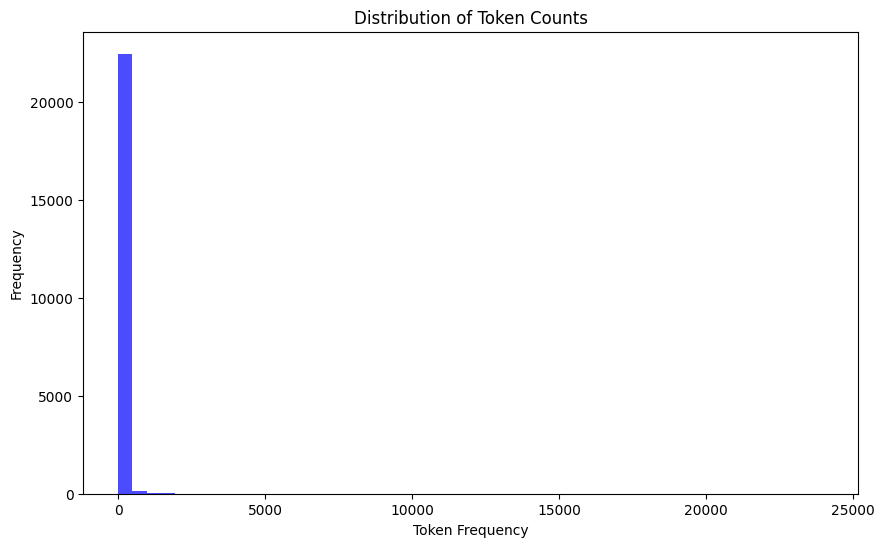

In [59]:
#Creating dictionary
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
def full_vocabluary(data):
    all_tokens = [token for doc in data[0] for token in doc]
    token_counts = Counter(all_tokens)
    vocabluary = dict(token_counts)
    return vocabluary
vocab = full_vocabluary(train)
print("Length of the dictionary before reduction: ", len(vocab))
def token_statistics(vocab):
    counts = list(vocab.values())  # Get the token counts from the vocabulary
    mean = np.mean(counts)
    max_count = np.max(counts)
    min_count = np.min(counts)
    std_dev = np.std(counts)

    return mean, max_count, min_count, std_dev

mean, max_count, min_count, std_dev = token_statistics(vocab)

print(f"Mean: {mean}")
print(f"Max: {max_count}")
print(f"Min: {min_count}")
print(f"Standard Deviation: {std_dev}")

def plot_distribution(vocab):
    counts = list(vocab.values())  # Get the token counts
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=50, color='blue', alpha=0.7)
    plt.title("Distribution of Token Counts")
    plt.xlabel("Token Frequency")
    plt.ylabel("Frequency")
    plt.show()

plot_distribution(vocab)

<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>